In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./train.csv', index_col="PassengerId")

In [3]:
test = pd.read_csv('./test.csv', index_col="PassengerId") #ignore this. it doesn't have survivors

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
target = df[['Survived']]

In [6]:
target.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [7]:
df = df.drop(columns=['Survived'])

In [8]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [76]:
# Drop name column

# Create numeric binary column for sex is_female?
# df['Sex'] = (df['Sex'] == "female").astype(int)
df["is_female"] = df["Sex"].replace({"male": 0, "female": 1})
# df.drop(columns=["Sex"], inplace=True)

# Age - break out children as it's own column
df["Kid"] = (df["Age"] <= 18).astype(int)

# Age - fill in NAN with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Age cat

# treat Parch and SibSp as ordered cat - 0,1,2+
# df["Parch_cat"] = pd.cut(df["Parch"], [-1,0,1,100], labels=["0","1","2+"])
df["Parch_cat"] = pd.cut(df["Parch"], [-1,0,1,100]).cat.codes

# fare is skewed so log transform
df['Fare'] = np.log(df['Fare']+0.001)
df['Fare'] = df['Fare'].fillna(0)

# Cabin, we can break up to get more info.
# categorize by first letter
# df["Cabin"].apply(lambda x: str(x)[0].upper())
# NEED TO MAKE NUMERIC

# df["Cabin"].apply(lambda x: len(str(x).split(" "))) # since there are only 1% of cabins >= 3 its not meaningful and only 3% > 1 we can skip
# categorize by how many cabins in one entry
# deal with nulls -


In [35]:
df['Parch'].value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [36]:
df['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [77]:
df['Fare'].value_counts().head(20)

-0.305670    43
-0.058309    42
-0.318389    38
-0.330917    34
 0.167599    31
-0.154941    24
-0.315940    18
-0.328733    16
-0.380197    15
 0.000000    15
 0.172998    15
-0.321912    13
-0.259855    13
-0.378078    13
-0.380627    12
-0.207030     9
 0.023138     9
 0.148036     8
 0.009606     8
-0.016284     7
Name: Fare, dtype: int64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


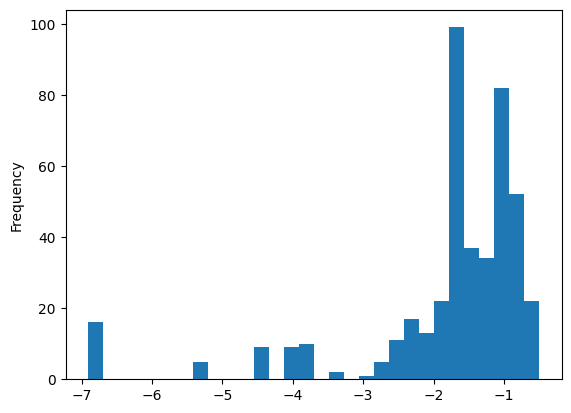

In [78]:
np.log(df['Fare']+0.001).plot(kind='hist', bins=30);

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     891 non-null    int64   
 1   Name       891 non-null    object  
 2   Sex        891 non-null    object  
 3   Age        891 non-null    float64 
 4   SibSp      891 non-null    int64   
 5   Parch      891 non-null    int64   
 6   Ticket     891 non-null    object  
 7   Fare       891 non-null    float64 
 8   Cabin      204 non-null    object  
 9   Embarked   889 non-null    object  
 10  is_female  891 non-null    int64   
 11  Kid        891 non-null    int64   
 12  Parch_cat  891 non-null    int8    
 13  age_cat    891 non-null    category
dtypes: category(1), float64(2), int64(5), int8(1), object(5)
memory usage: 124.8+ KB


In [40]:
df['Cabin'].value_counts(normalize=True)

B96 B98        0.019608
G6             0.019608
C23 C25 C27    0.019608
C22 C26        0.014706
F33            0.014706
                 ...   
E34            0.004902
C7             0.004902
C54            0.004902
E36            0.004902
C148           0.004902
Name: Cabin, Length: 147, dtype: float64

In [41]:
df['Age'].value_counts(normalize=True)

28.00    0.226712
24.00    0.033670
22.00    0.030303
18.00    0.029181
19.00    0.028058
           ...   
36.50    0.001122
55.50    0.001122
0.92     0.001122
23.50    0.001122
74.00    0.001122
Name: Age, Length: 88, dtype: float64

<Axes: ylabel='Frequency'>

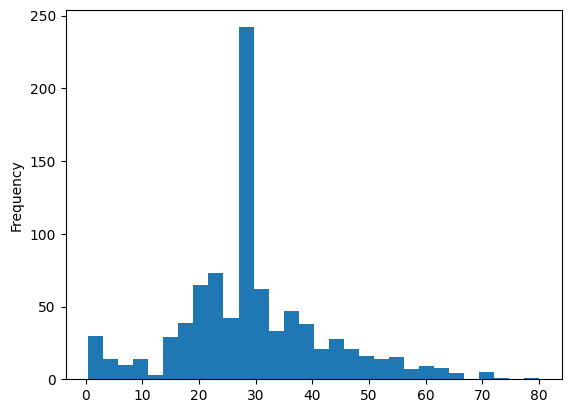

In [42]:
df['Age'].plot(kind='hist', bins=30)

In [43]:
df.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,Kid,Parch_cat,age_cat
count,891.000000,891,891,891.000000,891.000000,891.000000,891,876.000000,204,889,891.000000,891.000000,891.000000,891
unique,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN,NaN,NaN,6
top,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN,NaN,NaN,"(25.0, 28.0]"
freq,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN,NaN,NaN,238
mean,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,1.033533,NaN,NaN,0.352413,0.156004,0.345679,NaN
std,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,0.299343,NaN,NaN,0.477990,0.363063,0.663266,NaN
min,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.329781,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,0.728103,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,0.984031,NaN,NaN,0.000000,0.000000,0.000000,NaN
75%,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,1.236590,NaN,NaN,1.000000,0.000000,0.000000,NaN


In [44]:
target.value_counts(normalize=True)

Survived
0           0.616162
1           0.383838
dtype: float64

In [45]:
# split to columns and deal with the data separately: numerical vs non-numerical
num_col = df.select_dtypes(include=np.number).columns
num_col

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_female', 'Kid',
       'Parch_cat'],
      dtype='object')

In [46]:
#create dict for the num columns
num_lookup = df[num_col].mean().to_dict()

In [47]:
df[num_col].describe()

,Pclass,Age,SibSp,Parch,Fare,is_female,Kid,Parch_cat
count,891.000000,891.000000,891.000000,891.000000,876.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,1.033533,0.352413,0.156004,0.345679
std,0.836071,13.019697,1.102743,0.806057,0.299343,0.477990,0.363063,0.663266
min,1.000000,0.420000,0.000000,0.000000,0.329781,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.728103,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.984031,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.236590,1.000000,0.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,1.830975,1.000000,1.000000,2.000000


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
df["age_cat"] = pd.cut(df["Age"], bins=6)
df["age_cat"].describe()

# df.groupby("is_female").agg({"target": ["count", "mean", "std"]})

count                 891
unique                  6
top       (26.947, 40.21]
freq                  422
Name: age_cat, dtype: object

In [84]:
train = df[num_col].copy()

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Age        891 non-null    float64
 2   SibSp      891 non-null    int64  
 3   Parch      891 non-null    int64  
 4   Fare       891 non-null    float64
 5   is_female  891 non-null    int64  
 6   Kid        891 non-null    int64  
 7   Parch_cat  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1)
memory usage: 88.8 KB


In [87]:
target.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [89]:
train = pd.merge(left=train, right=target, how="left", left_index=True, right_index=True)

In [90]:
train, test = train_test_split(
    train,                           # input the df
    test_size=0.20,               # set test size to be 20% of the dataset
    random_state=42,              # name the random state. it can be anything integer. this just lets us call it again later.
    shuffle=True,                  # if you want to shuffle before splitting. you should
    stratify=train['Survived']                # stratify the shuffled data on this column...???
)

In [94]:
train.shape

(712, 9)

In [95]:
test.shape

(179, 9)

In [131]:
train['Survived'].value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [99]:
test['Survived'].value_counts(normalize=True)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
X_train = train.drop(columns=['Survived'])   # whole df minus target column
y_train = train['Survived']                  # just the target column

In [105]:
X_test = test.drop(columns=['Survived'])
y_test = test['Survived']

In [107]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=0,
    bootstrap=True,
    class_weight='balanced',
    # verbose=1,
    n_jobs=-1,
)

In [108]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_jobs=-1,
                       random_state=0)

## Predictions

In [113]:
train['y_prob'] = rf.predict_proba(X_train)[:,1]

In [114]:
test['y_prob'] = rf.predict_proba(X_test)[:,1]

In [289]:
train['y_pred'] = (train['y_prob'] > .4).astype(int)

In [118]:
test['y_pred'] = (test['y_prob'] > .5).astype(int)

In [290]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,is_female,Kid,Parch_cat,Survived,y_prob,y_pred
PassengerId,,,,,,,,,,,
693,3,28.0,0,0,0.333648,0,0,0,1,0.448299,1
482,2,28.0,0,0,0.000000,0,0,0,0,0.236092,0
528,1,28.0,0,0,0.523483,0,0,0,0,0.533356,1
856,3,18.0,0,1,-0.215790,1,1,1,1,0.627330,1
802,2,31.0,1,1,0.170075,1,0,1,1,0.857021,1


## Performance

In [120]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [232]:
def model_metrics(df:pd.DataFrame)-> dict:
    '''Input a titanic dataset model dataframe and get a dict of the following metrics:
    true_pos = true positive
    true_neg = true negative
    TypeIError = false positive (Type I Error)
    TypeIIError = false negative (Type II Error)
    Recall
    Precision
    Accuracy
    F1-score
    ROC_AUC
    '''
    confusion = pd.crosstab(df['Survived'], df['y_pred'], margins=True)
    tp = confusion.iloc[1,1]
    tn = confusion.iloc[0,0]
    fp = confusion.iloc[0,1] # Type I error
    fn = confusion.iloc[1,0] # Type II error
    overall = confusion.iloc[2,2] # for accuracy
    recall = tp/(tp+fn)
    prec = tp/(tp+fn)
    acc =  (tp+tn)/overall
    f1 = (recall*prec*2)/(recall + prec)
    roc = roc_auc_score(df['Survived'], df['y_pred'])
    return{
        'true_pos'   : tp,
        'true_neg'   : tn,
        'TypeIError' : fp,
        'TypeIIError': fn,
        'Recall'     : round(recall, 3),
        'Precision'  : round(prec, 3),
        'Accuracy'   : round(acc, 3),
        'F1-score'   : round(f1, 3),
        'ROC-AUC'    : round(roc, 3)
    }

In [291]:
# start with the confusion matrix
df_ = train

In [292]:
model_metrics(df_)

{'true_pos': 237,
 'true_neg': 336,
 'TypeIError': 103,
 'TypeIIError': 36,
 'Recall': 0.868,
 'Precision': 0.868,
 'Accuracy': 0.805,
 'F1-score': 0.868,
 'ROC-AUC': 0.817}

In [130]:

matrix = pd.crosstab(df_['Survived'], df_['y_pred'], margins=True)
matrix

y_pred,0,1,All
Survived,,,
0,376,63,439
1,59,214,273
All,435,277,712


In [138]:
tp = matrix.iloc[1,1]

214

In [153]:
tn = matrix.iloc[0,0]

In [154]:
fp = matrix.iloc[0,1] # Type I error

In [155]:
fn = matrix.iloc[1,0] # Type II error

In [156]:
overall = matrix.iloc[2,2] # for accuracy

In [188]:
print('*'*10, "Training Metrics",'*'*10)
print(f'type I error       = {fp}')
print(f'type II error      = {fn}')


# tp/(tp+fn)
recall = tp/(tp+fn)
print(f'recall             = {recall:.2f}')

# tp/(tp+fp)
prec = tp/(tp+fn)
print(f'precision          = {prec:.2f}')

# tp + tn/overall
acc =  (tp+tn)/overall
print(f'accuracy           = {acc:.2f}')

# recall*prec*2/(recall + prec)
f1 = (recall*prec*2)/(recall + prec)
print(f'f1                 = {f1:.2f}')


********** Training Metrics **********
type I error       = 63
type II error      = 59
recall             = 0.78
precision          = 0.78
accuracy           = 0.83
f1                 = 0.78


In [122]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       439
           1       0.77      0.78      0.78       273

    accuracy                           0.83       712
   macro avg       0.82      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712



In [189]:
roc_auc_score(df_['Survived'], df_['y_pred'])

0.8201874056088179

In [241]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [242]:
roc_auc_score(test['Survived'], test['y_pred'])

0.7995388669301713

In [200]:
feat_imp = dict(zip(rf.feature_names_in_,rf.feature_importances_))
feat_imp

{'Pclass': 0.17337420048033186,
 'Age': 0.08770259222526798,
 'SibSp': 0.058750302734815144,
 'Parch': 0.03060821375270653,
 'Fare': 0.17460533291040714,
 'is_female': 0.4310965904596918,
 'Kid': 0.01604356165393239,
 'Parch_cat': 0.027819205782847054}

In [204]:
feature_imp = pd.Series(feat_imp).sort_values(ascending=False)

In [205]:
df_.head()

,Pclass,Age,SibSp,Parch,Fare,is_female,Kid,Parch_cat,Survived,y_prob,y_pred
PassengerId,,,,,,,,,,,
693,3,28.0,0,0,0.333648,0,0,0,1,0.448299,0
482,2,28.0,0,0,0.000000,0,0,0,0,0.236092,0
528,1,28.0,0,0,0.523483,0,0,0,0,0.533356,1
856,3,18.0,0,1,-0.215790,1,1,1,1,0.627330,1
802,2,31.0,1,1,0.170075,1,0,1,1,0.857021,1


In [210]:
df_[['Age', 'Fare','y_prob']].corr()

,Age,Fare,y_prob
Age,1.000000,0.107224,-0.028233
Fare,0.107224,1.000000,0.594894
y_prob,-0.028233,0.594894,1.000000


In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

## Tomorrow
1. Get probability predictions - for some classifier that has categories as inputs (i.e. have y_true, y_pred, and features that include a categorgy)
2. calcualte your metrics (i.e. conf matrix, prec, recall, f1, AUC)
3. calculate metrics - splitting on the categorical feature (i.e. use group by)




In [237]:
#split the test set  by male/female and run my metrics on both

fema_df = test[test['is_female'] == 1]
male_df = test[test['is_female'] == 0]

In [238]:
female_metrics = model_metrics(fema_df)
male_metrics = model_metrics(male_df)

In [239]:
female_metrics

{'true_pos': 45,
 'true_neg': 6,
 'TypeIError': 10,
 'TypeIIError': 0,
 'Recall': 1.0,
 'Precision': 1.0,
 'Accuracy': 0.836,
 'F1-score': 1.0,
 'ROC-AUC': 0.688}

In [240]:
male_metrics

{'true_pos': 7,
 'true_neg': 87,
 'TypeIError': 7,
 'TypeIIError': 17,
 'Recall': 0.292,
 'Precision': 0.292,
 'Accuracy': 0.797,
 'F1-score': 0.292,
 'ROC-AUC': 0.609}

In [243]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,is_female,Kid,Parch_cat,Survived,y_prob,y_pred
PassengerId,,,,,,,,,,,
566,3,24.0,2,0,0.148036,0,0,0,0,0.285683,0
161,3,44.0,0,1,0.023138,0,0,1,0,0.337443,0
554,3,22.0,0,0,-0.380627,0,0,0,1,0.200532,0
861,3,41.0,2,0,-0.025582,0,0,0,0,0.215940,0
242,3,28.0,1,0,0.009606,1,0,0,1,0.603278,1


In [249]:
thresh = .9

In [250]:
new_thresh.sum()

7

In [276]:
new_thresh =(test['y_prob'] > .1).astype(int)
c =pd.crosstab(test["Survived"], new_thresh, margins=True)
c
# tpr = c.iloc[1,1]/c.iloc[2,2]

y_prob,1,All
Survived,,
0,110,110
1,69,69
All,179,179


In [278]:
# thresh = .9
# new_thresh =(test['y_prob'] > .9).astype(int)
# c =pd.crosstab(test["Survived"], new_thresh, margins=True)
# tpr = c.iloc[1,1]/c.iloc[2,2]
# fpr = c.iloc[0,1]/c.iloc[2,2]
# (fpr,tpr)

result=[]
for thresh in range(90,11, -10):
    thresh = thresh/100.
    new_thresh =(test['y_prob'] > thresh).astype(int)
    c =pd.crosstab(test["Survived"], new_thresh, margins=True)
    tpr = c.iloc[1,1]/c.iloc[2,2]
    fpr = c.iloc[0,1]/c.iloc[2,2]
    result.append((fpr,tpr))

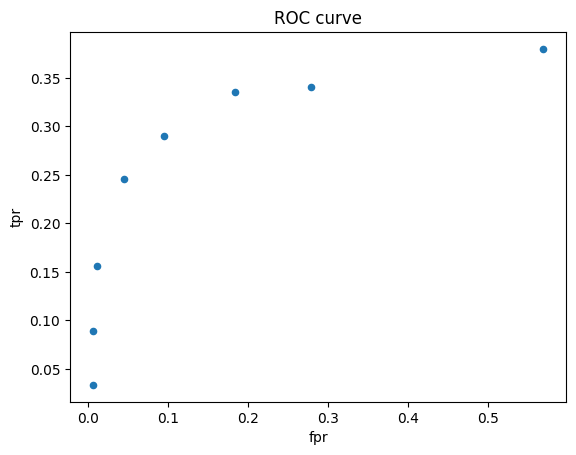

In [288]:
pd.DataFrame(result, columns=['fpr', 'tpr']).plot(kind='scatter', x='fpr', y='tpr', title='ROC curve');


In [260]:
# tp/[all,all]
y

0.0335195530726257

In [262]:
x

0.00558659217877095